<a href="https://colab.research.google.com/github/rickwag/ML/blob/main/MNISTWithLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#data acquisation
data_url = "/content/sample_data/mnist_train_small.csv"

import pandas as pd

df = pd.read_csv(data_url)

In [5]:
df.head(5)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(19999, 785)

In [36]:
import matplotlib.pyplot as plt

def show_image(digit, title = "digit"):
  digit = digit.to_numpy()
  digit = digit.reshape((28, 28))

  plt.gray()
  plt.imshow(digit)
  plt.title(title)
  plt.show()

In [11]:
#data preparation
#data splitting into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=.2)

In [12]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15999, 784)
(15999,)
(4000, 784)
(4000,)


In [62]:
#model creation
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50)

In [63]:
#model training
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=50)

In [64]:
#evalution
#accuracy
model.score(X_test, y_test)

0.91025

In [65]:
predictions = model.predict(X_test)

In [41]:
import random

def get_random_test_index():
  return random.randrange(0, len(X_test))

def get_random_test_indices(count = 5):
  indices = []

  for n in range(count):
    indices.append(get_random_test_index())
  
  return indices

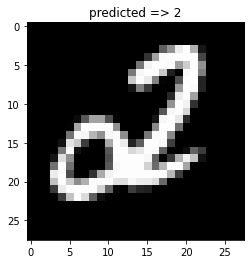

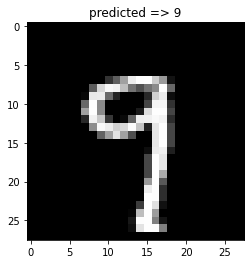

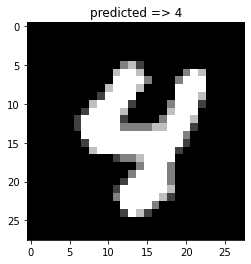

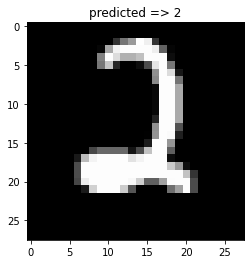

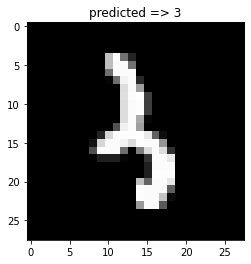

In [66]:
random_indices = get_random_test_indices(5)

for n in random_indices:
  show_image(X_test.iloc[n, : ], "predicted => " + str(predictions[n]))

In [67]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[419,   0,   0,   1,   1,   5,   5,   2,   3,   0],
       [  1, 464,   0,   2,   1,   1,   1,   2,   4,   0],
       [  3,   2, 330,  11,   3,   1,   3,   3,   6,   3],
       [  1,   3,   6, 350,   0,  16,   0,   8,   6,   6],
       [  0,   3,   1,   2, 376,   0,   2,   3,   3,  28],
       [  6,   3,   4,  24,   4, 307,   6,   2,   8,   6],
       [  4,   0,   5,   0,   5,   4, 370,   1,   3,   0],
       [  0,   1,   4,   1,   2,   1,   1, 356,   3,  13],
       [  3,   5,   7,   8,   0,  23,   1,   2, 318,   4],
       [  0,   1,   1,   8,  11,   2,   0,  15,   5, 351]])

Text(69.0, 0.5, 'truth')

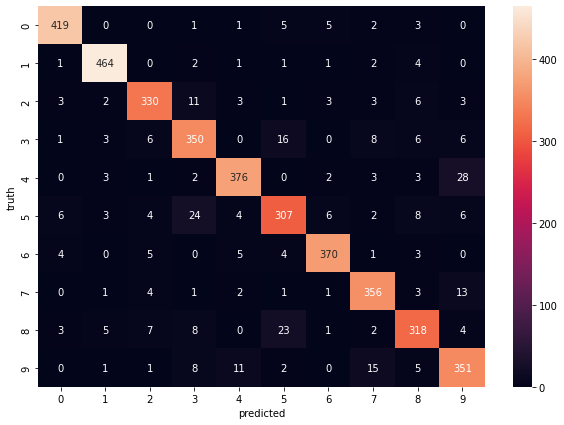

In [68]:
import seaborn as sb

plt.figure(figsize = (10, 7))

sb.heatmap(cm, annot = True, fmt = "d")

plt.xlabel("predicted")
plt.ylabel("truth")